In [5]:
import pandas as pd
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）


# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [6]:
df = pd.read_excel("中间数据集\\初始数据集1.xlsx")
df.head()

,文物编号,纹饰,类型,颜色,表面风化
0,1,C,高钾,蓝绿,无风化
1,2,A,铅钡,浅蓝,风化
2,3,A,高钾,蓝绿,无风化
3,4,A,高钾,蓝绿,无风化
4,5,A,高钾,蓝绿,无风化


## ***卡方检验判断是否有显著关系***

In [7]:
from scipy.stats import chi2_contingency

# 创建列联表
contingency_table1 = pd.crosstab(df['表面风化'], df['纹饰'])
contingency_table2 = pd.crosstab(df['表面风化'], df['类型'])
contingency_table3 = pd.crosstab(df['表面风化'], df['颜色'])

# 进行卡方检验
chi2_1, p_1, dof, expected = chi2_contingency(contingency_table1)
chi2_2, p_2, dof, expected = chi2_contingency(contingency_table2)
chi2_3, p_3, dof, expected = chi2_contingency(contingency_table3)

# 结果写入
pd.DataFrame({
    'ID': ['表面风化-纹饰', '表面风化-类型', '表面风化-颜色'],
    '统计量': [chi2_1, chi2_2, chi2_3], 
    'p_value': [p_1, p_2, p_3],
    }).to_excel('结果\\1_卡方检验结果.xlsx', index=False)

## ***数据可视化定性判断关系***

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


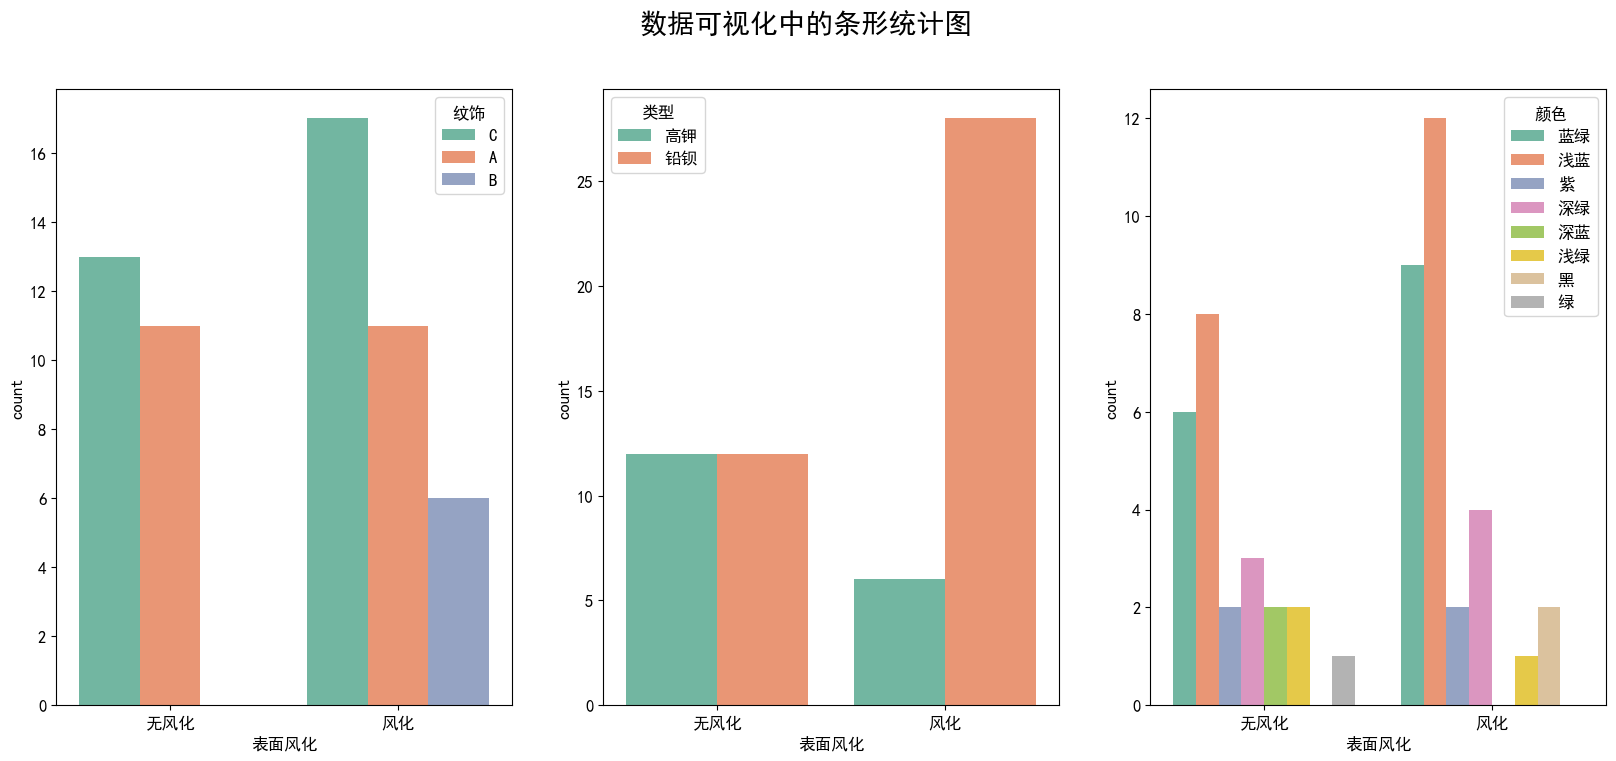

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
fig.suptitle('数据可视化中的条形统计图', fontsize=20) 
     		
sns.countplot(x='表面风化', hue="纹饰", palette='Set2', data=df, ax=ax[0])
sns.countplot(x='表面风化', hue="类型", palette='Set2', data=df, ax=ax[1])
sns.countplot(x='表面风化', hue="颜色", palette='Set2', data=df, ax=ax[2])

fig.savefig('图片\\3_第一题第一问双变量可视化.eps')